In [77]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [78]:
df = pd.read_csv('../harnasieBytehack/data/training.1600000.processed.noemoticon.csv', encoding = 'Latin-1', names=('target','id','date','flag','username','tweet'))
# print(df.head())
df1 = df.iloc[:20000,:]
df2 = df.iloc[len(df)-20000:,:]

print(f'dlugosc data frame 1: {len(df1)}')
print(f'dlugosc data frame 1: {len(df2)}')

df = pd.concat([df1, df2])

df.to_csv('Dane1.csv')

dlugosc data frame 1: 20000
dlugosc data frame 1: 20000


In [79]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   target    40000 non-null  int64 
 1   id        40000 non-null  int64 
 2   date      40000 non-null  object
 3   flag      40000 non-null  object
 4   username  40000 non-null  object
 5   tweet     40000 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.1+ MB
None


In [80]:
# df.drop(['date','flag','username'], axis=1, inplace=True)
# df.drop('id', axis=1, inplace=True)

print(df.head())
print(df.tail())

   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

          username                                              tweet  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
         target          id                          date      flag  \
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Ju

In [81]:
# FOR STOP WORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

print('\nDownloaded packages\n')


Downloaded packages



[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\wikto\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wikto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wikto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wikto\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [82]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def data_preprocessing(raw_text):
    #Data Cleansing
    sentence = re.sub(r'[^\w\s]', ' ',raw_text )
    #Removing numbers
    sentence = re.sub(r'[0-9]', '', sentence)
    #Tokenization
    words = nltk.word_tokenize(sentence)
    #Lowercase
    for word in words:
            word.lower()
    #Stop words removal
    words = [w for w in words if not w in stop_words]
    #stemming
    words = [stemmer.stem(w) for w in words]
    #Lemmatization
    final_words = [lemmatizer.lemmatize(w) for w in words]
    return  final_words 


In [83]:
df.tweet[1]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

In [84]:
df.tweet = df.tweet.apply(data_preprocessing)

In [85]:
df.tweet[1]

['upset',
 'updat',
 'facebook',
 'text',
 'might',
 'cri',
 'result',
 'school',
 'today',
 'also',
 'blah']

In [52]:
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

string_list = []
for i in df.tweet :
    string = listToString(i)
    string_list.append(string)
    
# storing the string list created into the dataframe
df.tweet = string_list

In [53]:
df.tweet


0          switchfoot http twitpic com yzl awww bummer yo...
1          upset updat facebook text might cri result sch...
2          kenichan i dive mani time ball manag save the ...
3                            whole bodi feel itchi like fire
4                            nationwideclass behav mad i see
                                 ...                        
1599995                 just woke have school best feel ever
1599996    thewdb com veri cool hear old walt interview â...
1599997                     are readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: tweet, Length: 40000, dtype: object

In [54]:
# converting the 4 in target column to 1 to denote the value 'positive'
df.target = df.target.apply(lambda x: 1 if x==4 else x)

In [55]:
X = df.tweet
y = df.target

In [56]:
# splitting the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [57]:
# tranforming the tweet data into vectors matrix
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000, lowercase= False)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  179755


In [58]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [59]:
naive_model = ComplementNB().fit(X_train,y_train)


In [60]:
y_pred1 = naive_model.predict(X_test)
print(confusion_matrix(y_pred1,y_test))

print(classification_report(y_pred1,y_test))


[[4819 1728]
 [1178 4275]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      6547
           1       0.71      0.78      0.75      5453

    accuracy                           0.76     12000
   macro avg       0.76      0.76      0.76     12000
weighted avg       0.76      0.76      0.76     12000



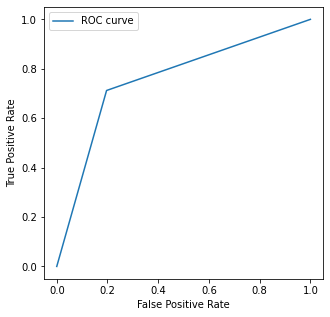

In [61]:
fpr_dt_1, tpr_dt_1,_ = roc_curve(y_test,y_pred1)
plt.plot(fpr_dt_1,tpr_dt_1,label = "ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(5, 5)
plt.show()

In [62]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='liblinear').fit(X_train,y_train)
y_pred2= logistic.predict(X_test)
print(confusion_matrix(y_pred2,y_test))

print(classification_report(y_pred2,y_test))


[[4561 1460]
 [1436 4543]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6021
           1       0.76      0.76      0.76      5979

    accuracy                           0.76     12000
   macro avg       0.76      0.76      0.76     12000
weighted avg       0.76      0.76      0.76     12000



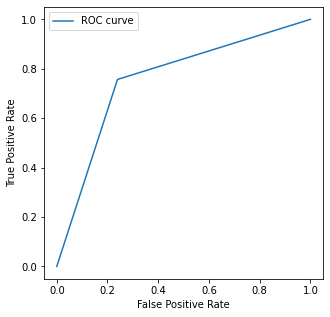

In [63]:
fpr_dt_1, tpr_dt_1,_ = roc_curve(y_test,y_pred2)
plt.plot(fpr_dt_1,tpr_dt_1,label = "ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(5, 5)
plt.show()

[[4660 1446]
 [1337 4557]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      6106
           1       0.76      0.77      0.77      5894

    accuracy                           0.77     12000
   macro avg       0.77      0.77      0.77     12000
weighted avg       0.77      0.77      0.77     12000



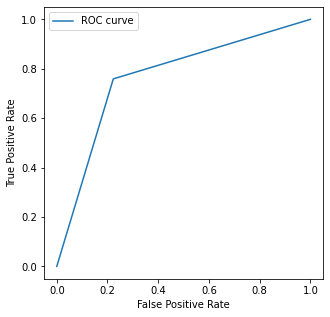

In [64]:
from sklearn.svm import LinearSVC
SVC = LinearSVC().fit(X_train,y_train)
y_pred3 = SVC.predict(X_test)
print(confusion_matrix(y_pred3,y_test))

print(classification_report(y_pred3,y_test))
fpr_dt_1, tpr_dt_1,_ = roc_curve(y_test,y_pred3)
plt.plot(fpr_dt_1,tpr_dt_1,label = "ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(5, 5)
plt.show()

In [65]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred4 = model.predict(X_test)
print(confusion_matrix(y_pred4,y_test))
print(classification_report(y_pred4 ,y_test))


C:\Users\wikto\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:22:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[4033 1318]
 [1964 4685]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      5351
           1       0.78      0.70      0.74      6649

    accuracy                           0.73     12000
   macro avg       0.73      0.73      0.73     12000
weighted avg       0.73      0.73      0.73     12000



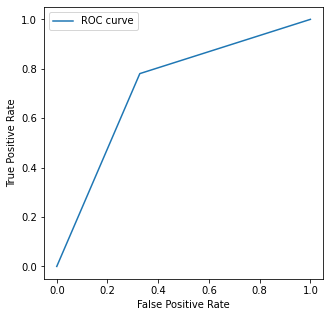

In [66]:
fpr_dt_1, tpr_dt_1,_ = roc_curve(y_test,y_pred4)
plt.plot(fpr_dt_1,tpr_dt_1,label = "ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(5, 5)
plt.show()

In [67]:
# dataframe for test and predicted sentiments (from logistic regression model)
test = pd.DataFrame(list(zip((vectoriser.inverse_transform(X_test)) ,y_pred2, y_test)),
                    columns = ['TEST_TWEETS', 'PREDICTED' , 'ORIGINAL'])

In [69]:
type(test)
test.to_excel("output2.xlsx") 

In [70]:
len(test)
print(test.columns)

print(test['PREDICTED'])

Index(['TEST_TWEETS', 'PREDICTED', 'ORIGINAL'], dtype='object')
0        1
1        0
2        1
3        0
4        1
        ..
11995    0
11996    0
11997    1
11998    0
11999    1
Name: PREDICTED, Length: 12000, dtype: int64


In [71]:
df = test[test['PREDICTED'] == test['ORIGINAL']]
print(len(df))

9104


In [72]:
f'accuracy {len(df)/len(test)}'

'accuracy 0.7586666666666667'